In [34]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread, imshow
cle.select_device('TX')  # TODO: change to your GPU

<NVIDIA GeForce RTX 2080 SUPER on Platform: NVIDIA CUDA (2 refs)>

# Apply operations on data

One goal behind the clesperanto project is to standardised as much as possible the librairy usage in order to make is as easy as possible to learn and to use.
In this notebook we will see how to apply operations on a data.

All operations follows the same pattern:

- `cle.operation_name(input, output, parameters)`

where:
- `cle` is the librairy handle
- `operation_name` is the name of the operation you want to apply
- `input` is the input data
- `output` is the output data
- `parameters` are the parameters of the operation

Of course, the method signature can becomme more complexe if you want to apply more advance operations, so do not hesitate to check the documentation of the operation you want to use.

```python
    cle.operation_name?
```

Like always let's first load an image ...

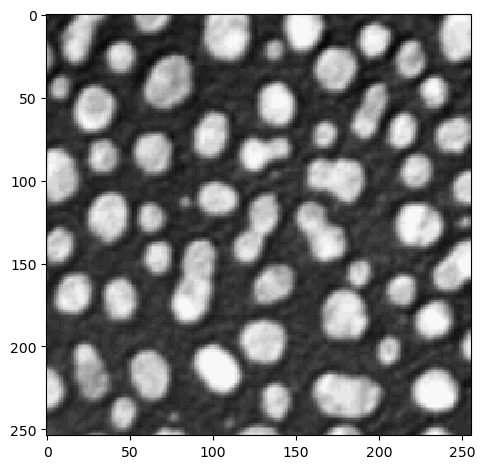

In [35]:
image = imread("../../data/blobs.tif")
imshow(image)

Now, to apply a `gaussian blur` on the image, we will need to first `push` the image into the GPU memory, `create` an output memory space in the GPU memory, and apply the operations. After than we only need to `pull` the image back to the CPU memory in order to display it.

In [36]:
cle.gaussian_blur?

Signature:
cle.gaussian_blur(
    source: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage],
    destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage] = None,
    sigma_x: float = 0,
    sigma_y: float = 0,
    sigma_z: float = 0,
) -> Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage]
Docstring:
Computes the Gaussian blurred image of an image given sigma values
in X, Y and Z. 

Thus, the filter kernel can have non-isotropic shape.

The implementation is done separable. In case a sigma equals zero, the 
direction is not blurred. 

Parameters
----------
source : Image
destination : Image, optional
sigma_x : Number, optional
sigma_y : Number, optional
sigma_z : Number, optional

Returns
-------
destination

Examples
--------
>

In [37]:
gpu_image = cle.push(image)
gpu_blurred = cle.create_like(gpu_image)
cle.gaussian_blur(gpu_image, gpu_blurred, sigma_x=5, sigma_y=5)
blurred = cle.pull(gpu_blurred)

/home/stephane/Libraries/miniconda3/envs/proto/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


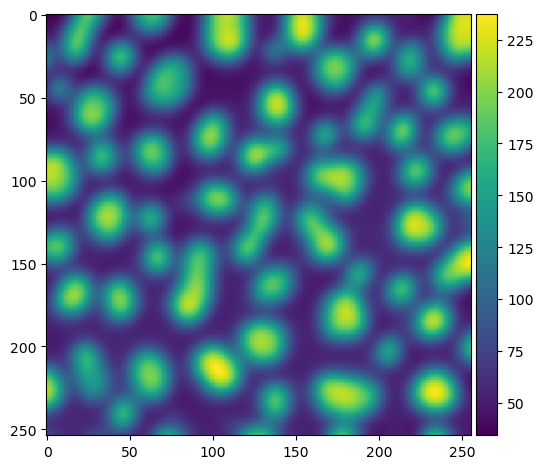

In [38]:
imshow(blurred)

## Exercise 1: Apply a threshold Otsu

Now that we have a blurred image, we can apply an automatic thresholding method to segment the image. We will use the Otsu thresholding method for that.
Push the blurred image into the GPU-memory, create an empty image as a destination output and apply the thresholding method `threshold_otsu`.

In [39]:
#TODO

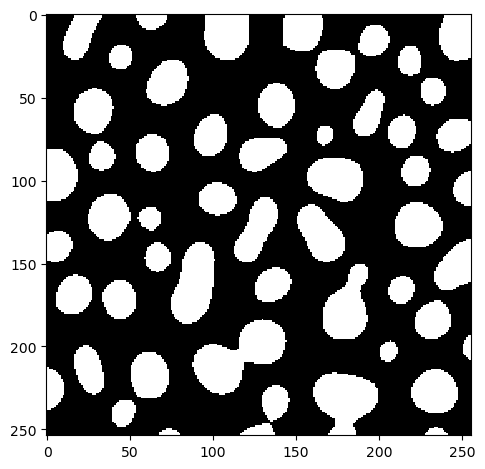

In [40]:
imshow(binary)

We have now done image processing on the GPU, Congratulations!

# Advance syntax

What we saw so far is the basic syntax, which is pedagogically useful as well as meant for interoperability with other languages. However, for python it can be quite verbose and redondant, and does not take advantage of the python language features.
The advance syntax is meant to be more pythonic, and should be more familiar to python users.

Let's start again with our gaussian blur example

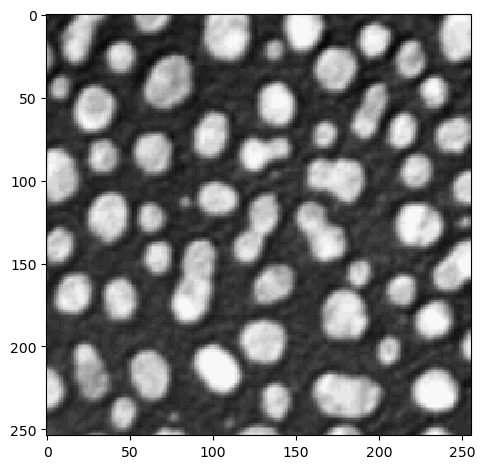

In [41]:
imshow(image)

Now lets apply the same operation (create, push, process, pull and display) on a 2D image and let's see the difference!

In [42]:
gpu_blurred = cle.gaussian_blur(image, sigma_x=5, sigma_y=5)

<class 'pyclesperanto_prototype._tier0._pycl.OCLArray'> (254, 256) float32


cl.OCLArray([[ 36.31585 ,  35.565746,  34.912598, ..., 222.99931 , 222.02263 ,
        220.73248 ],
       [ 36.782257,  36.15516 ,  35.637283, ..., 224.31996 , 223.42757 ,
        222.24292 ],
       [ 37.26939 ,  36.78303 ,  36.4241  , ..., 225.50473 , 224.6927  ,
        223.61147 ],
       ...,
       [ 72.366234,  71.292435,  70.081696, ...,  50.419292,  49.74722 ,
         49.331768],
       [ 74.50399 ,  73.28203 ,  71.91373 , ...,  50.695267,  49.891235,
         49.378292],
       [ 76.60113 ,  75.223755,  73.69109 , ...,  50.964607,  50.031273,
         49.423107]], dtype=float32)
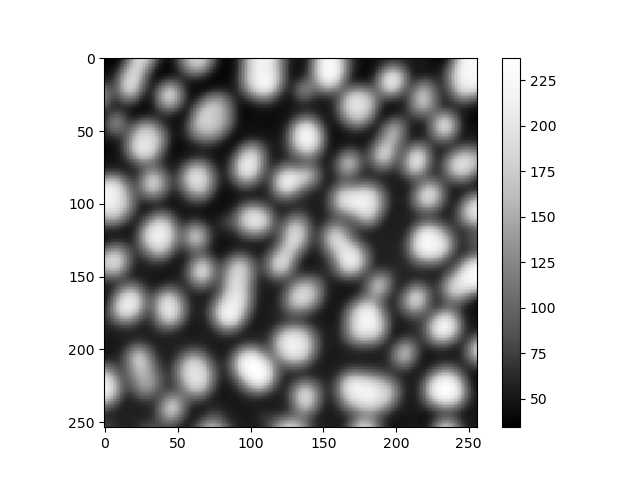
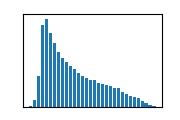

In [43]:
print(type(gpu_blurred), gpu_blurred.shape, gpu_blurred.dtype)
gpu_blurred

In [44]:
cle.gaussian_blur?

Signature:
cle.gaussian_blur(
    source: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage],
    destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage] = None,
    sigma_x: float = 0,
    sigma_y: float = 0,
    sigma_z: float = 0,
) -> Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage]
Docstring:
Computes the Gaussian blurred image of an image given sigma values
in X, Y and Z. 

Thus, the filter kernel can have non-isotropic shape.

The implementation is done separable. In case a sigma equals zero, the 
direction is not blurred. 

Parameters
----------
source : Image
destination : Image, optional
sigma_x : Number, optional
sigma_y : Number, optional
sigma_z : Number, optional

Returns
-------
destination

Examples
--------
>

If we look at the operation signature, we can observe that 
- the `destination` output can be optional as it is `None` by default
- the `source` input can also be a `numpy.ndarray`, so not a GPU array
- the operation returns the `destination` output

This however does not change the process, if a numpy array is passed as input, it will be `push`ing it to the GPU, the operation will be performed. If no `destination` output is provided, we will automatically create a new GPU array and return it.
Finally, the display still requires to `pull` the data back from the GPU in order to be readable.

## Array operatiors 

Mathematics behing at the base of image processing, mathematical operators are also part of the image processing toolbox.
A quick search of the available methods in the librairy reveals several mathematical operations:
- [add_images](https://clij.github.io/clij2-docs/reference_addImages)
- [binary_and](https://clij.github.io/clij2-docs/reference_binaryAnd)
- [add_image_and_scalar](https://clij.github.io/clij2-docs/reference_addImageAndScalar)
- etc.

These operations can be use the same way as any other filters, providing an input image and retrieving an output image. It is also possible to use them as data operators -, +, *, /, etc. - on the image data. These operators follow the same usage as numpy arrays API.

In [45]:
print("minimum intensity:", gpu_blurred.min())
print("maximum intensity:", gpu_blurred.max())

minimum intensity: 34.26861
maximum intensity: 237.56865


cl.OCLArray([[  0.     ,   0.     ,   0.     , ..., 222.99931, 222.02263,
        220.73248],
       [  0.     ,   0.     ,   0.     , ..., 224.31996, 223.42757,
        222.24292],
       [  0.     ,   0.     ,   0.     , ..., 225.50473, 224.6927 ,
        223.61147],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)
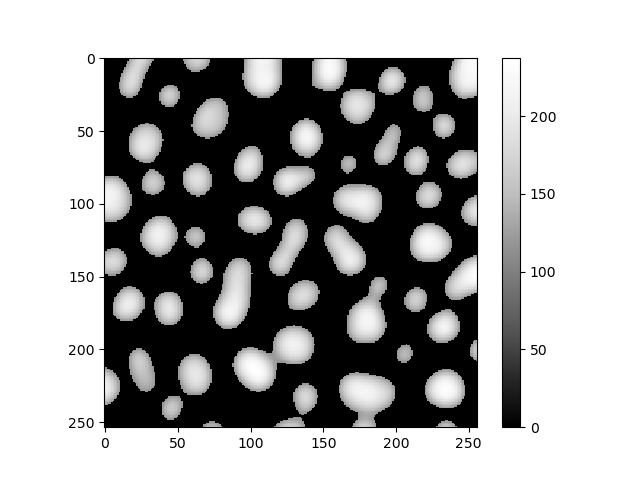
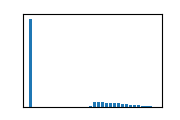

In [46]:
gpu_blurred * gpu_binary

cl.OCLArray([[-1.3684151e+01, -1.4434254e+01, -1.5087402e+01, ...,
         1.7299931e+02,  1.7202263e+02,  1.7073248e+02],
       [-1.3217743e+01, -1.3844841e+01, -1.4362717e+01, ...,
         1.7431996e+02,  1.7342757e+02,  1.7224292e+02],
       [-1.2730610e+01, -1.3216969e+01, -1.3575901e+01, ...,
         1.7550473e+02,  1.7469270e+02,  1.7361147e+02],
       ...,
       [ 2.2366234e+01,  2.1292435e+01,  2.0081696e+01, ...,
         4.1929245e-01, -2.5278091e-01, -6.6823196e-01],
       [ 2.4503990e+01,  2.3282028e+01,  2.1913727e+01, ...,
         6.9526672e-01, -1.0876465e-01, -6.2170792e-01],
       [ 2.6601128e+01,  2.5223755e+01,  2.3691093e+01, ...,
         9.6460724e-01,  3.1272888e-02, -5.7689285e-01]], dtype=float32)
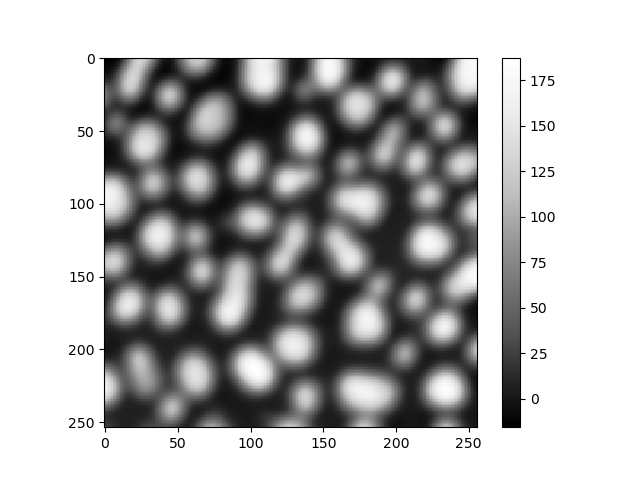
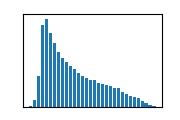

In [47]:
gpu_blurred - 50

## Exercise 2: Normalise the image `gpu_blurred` using operators

```
Inorm = (I - Imin) / (Imax - Imin)
```

<class 'pyclesperanto_prototype._tier0._pycl.OCLArray'> (254, 256) float32


cl.OCLArray([[0.01007005, 0.00638041, 0.00316768, ..., 0.9283358 , 0.92353165,
        0.91718554],
       [0.01236423, 0.00927964, 0.00673229, ..., 0.93483186, 0.9304423 ,
        0.92461514],
       [0.01476036, 0.01236804, 0.01060251, ..., 0.94065946, 0.9366653 ,
        0.9313469 ],
       ...,
       [0.18739605, 0.1821142 , 0.17615877, ..., 0.0794426 , 0.07613678,
        0.07409324],
       [0.19791132, 0.19190069, 0.18517023, ..., 0.08080007, 0.07684517,
        0.07432209],
       [0.2082268 , 0.20145173, 0.19391282, ..., 0.08212491, 0.07753399,
        0.07454252]], dtype=float32)
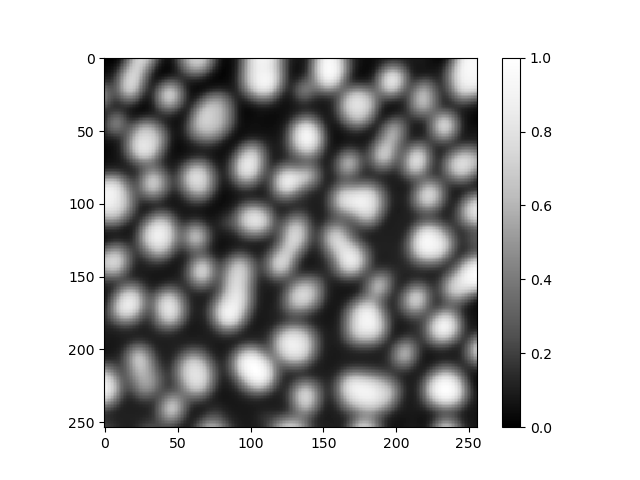
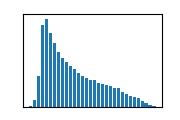

In [48]:
#TODO